In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtd/globalterrorismdb_0718dist.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#import terrorism dataset
terrorism = pd.read_csv("/kaggle/input/gtd/globalterrorismdb_0718dist.csv",encoding="ISO-8859-1")
print("There are {} rows and {} columns in the dataset".format(terrorism.shape[0],terrorism.shape[1]))
terrorism.columns

There are 181691 rows and 135 columns in the dataset


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [3]:
No_of_cols=terrorism.columns.nunique()
print("There are total %d columns in the data"%No_of_cols)
#let's rename some important columns
terrorism = terrorism.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})
                                 

There are total 135 columns in the data


In [4]:
terrorism = terrorism[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type']]
terrorism

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Military Checkpoint,Al-Shabaab,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary
181689,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Government Building/Facility/Office,Unknown,Explosives


In [5]:
terrorism ['Target_subtype'] = terrorism['Target_subtype'].fillna('others')
terrorism['City']=terrorism['City'].fillna('Unknown')
terrorism.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)
terrorism
terrorism.shape

(181691, 12)

In [6]:
terrorism.isnull().sum()
terrorism.head(10)
terrorism.columns.unique()

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type'],
      dtype='object')

In [7]:
terrorism.columns.nunique()
Total_countries=terrorism['Country'].nunique()
print("Total %d countries were noted in the data"%Total_countries)

Total 205 countries were noted in the data


In [8]:
print(terrorism['Region'].unique())
['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Saharan Africa' 'Middle East and North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']


['Central America & CaribbeanNorth AmericaSoutheast AsiaWestern EuropeEast AsiaSouth AmericaEastern EuropeSaharan AfricaMiddle East and North AfricaAustralasia & OceaniaSouth AsiaCentral Asia']

In [9]:
print(terrorism['Region'].nunique())

12


In [10]:
print(terrorism['Attack_type'].unique())
['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


['AssassinationHostage Taking (Kidnapping)Bombing/ExplosionFacility/Infrastructure AttackArmed AssaultHijackingUnknownUnarmed AssaultHostage Taking (Barricade Incident)']

In [11]:
print(terrorism['Target_type'].unique())
['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


['Private Citizens & PropertyGovernment (Diplomatic)Journalists & MediaPoliceUtilitiesMilitaryGovernment (General)Airports & AircraftBusinessEducational InstitutionViolent Political PartyReligious Figures/InstitutionsUnknownTransportationTouristsNGOTelecommunicationFood or Water SupplyTerrorists/Non-State MilitiaOtherMaritimeAbortion Related']

In [12]:
print(terrorism['Gang_name'].nunique())
print(terrorism['Weapon_type'].unique())
['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment' 'Vehicle' 'Fake Weapons' 'Radiological' 'Other'
 'Biological']

3537
['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment' 'Vehicle' 'Fake Weapons' 'Radiological' 'Other'
 'Biological']


['UnknownExplosivesIncendiaryFirearmsChemicalMeleeSabotage EquipmentVehicleFake WeaponsRadiologicalOtherBiological']

In [13]:
#information
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Year            181691 non-null  int64 
 1   Month           181691 non-null  int64 
 2   Day             181691 non-null  int64 
 3   Country         181691 non-null  object
 4   Region          181691 non-null  object
 5   State           181270 non-null  object
 6   City            181691 non-null  object
 7   Attack_type     181691 non-null  object
 8   Target_type     181691 non-null  object
 9   Target_subtype  181691 non-null  object
 10  Gang_name       181691 non-null  object
 11  Weapon_type     181691 non-null  object
dtypes: int64(3), object(9)
memory usage: 16.6+ MB


In [14]:
#View the statistical description of the dataset.
terrorism.describe()

,Year,Month,Day
count,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644
std,13.259430,3.388303,8.814045
min,1970.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000
50%,2009.000000,6.000000,15.000000
75%,2014.000000,9.000000,23.000000
max,2017.000000,12.000000,31.000000


In [15]:
#View top 10 countries.
terrorism['Country'].value_counts().head(10)

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64

In [16]:
#These were the top 10 affected countries.
terrorism['Region'].value_counts().head(10)

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: count, dtype: int64

In [17]:
#These were the top 10 affected regions.
terrorism['State'].value_counts().head(10)

State
Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: count, dtype: int64

In [18]:
#These were the top 10 affected states.
terrorism['Target_subtype'].value_counts().head(10)

Target_subtype
Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
others                                                     10373
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
Village/City/Town/Suburb                                    6542
Politician or Political Party Movement/Meeting/Rally        6306
Police Building (headquarters, station, school)             5907
Military Barracks/Base/Headquarters/Checkpost               5211
Name: count, dtype: int64

In [19]:
#These were the top 10 affected cities.
terrorism['Attack_type'].value_counts().head(10)

Attack_type
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64

In [20]:
#These were the top 10 chosen attacking modes.
terrorism['Target_type'].value_counts().head(10)

Target_type
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: count, dtype: int64

In [21]:
#These were the top 10 targets to attack.
terrorism['Gang_name'].value_counts().head(10)


Gang_name
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: count, dtype: int64

In [22]:
#These were the most dangerous and leading top 10 gangs.
terrorism['Weapon_type'].value_counts().head(5)

Weapon_type
Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Name: count, dtype: int64

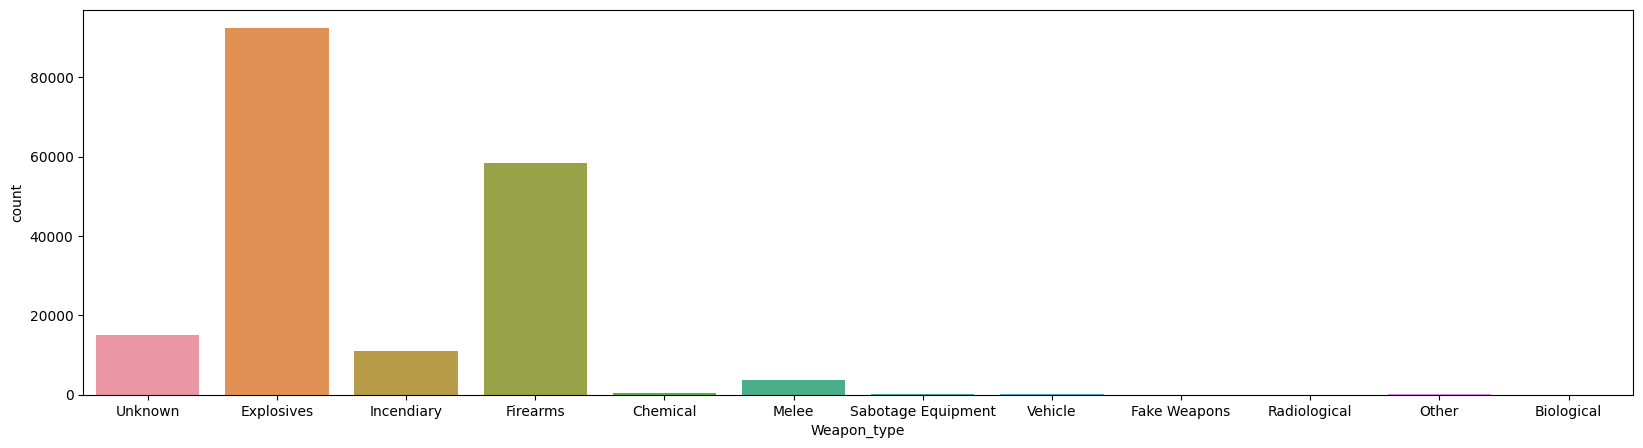

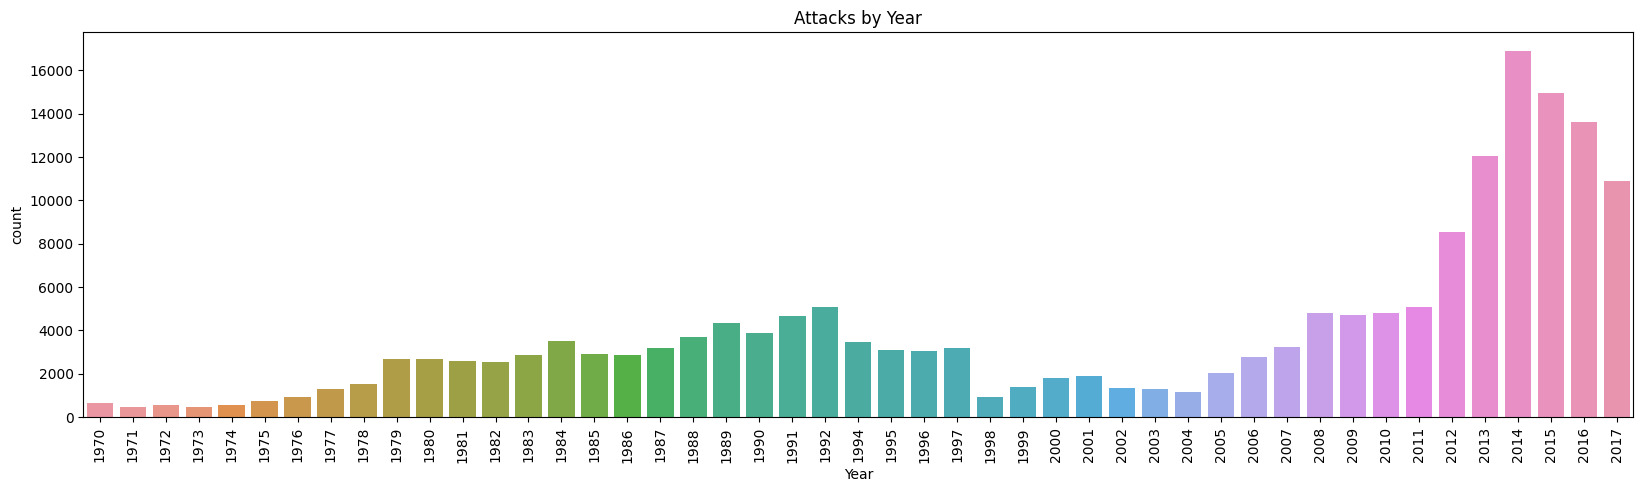

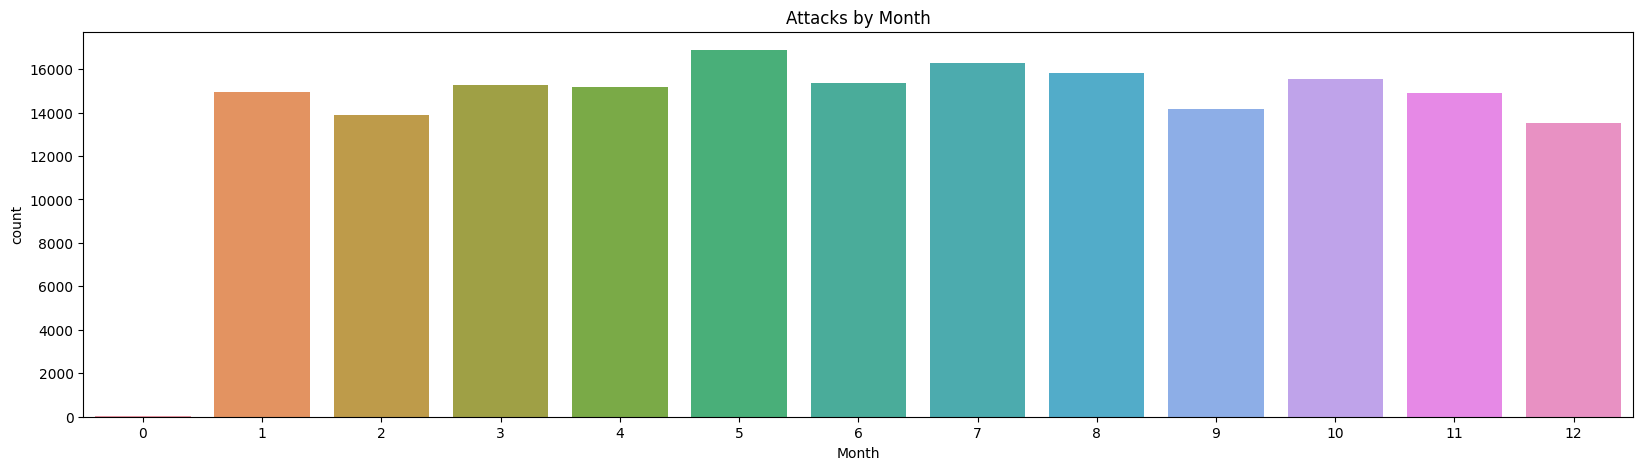

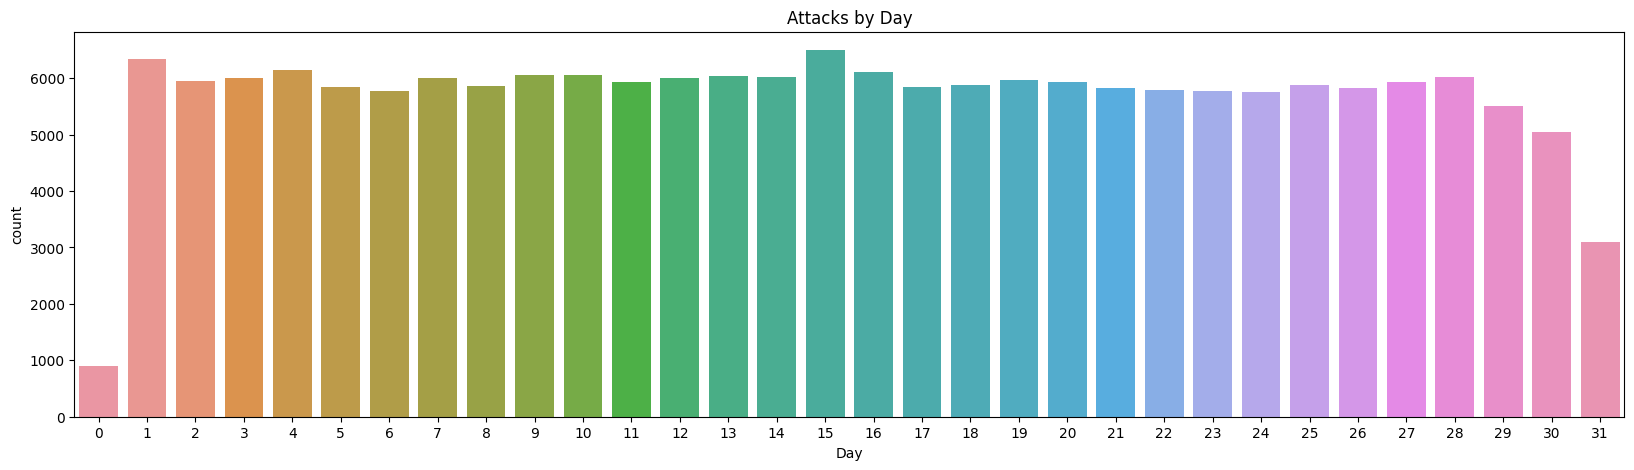

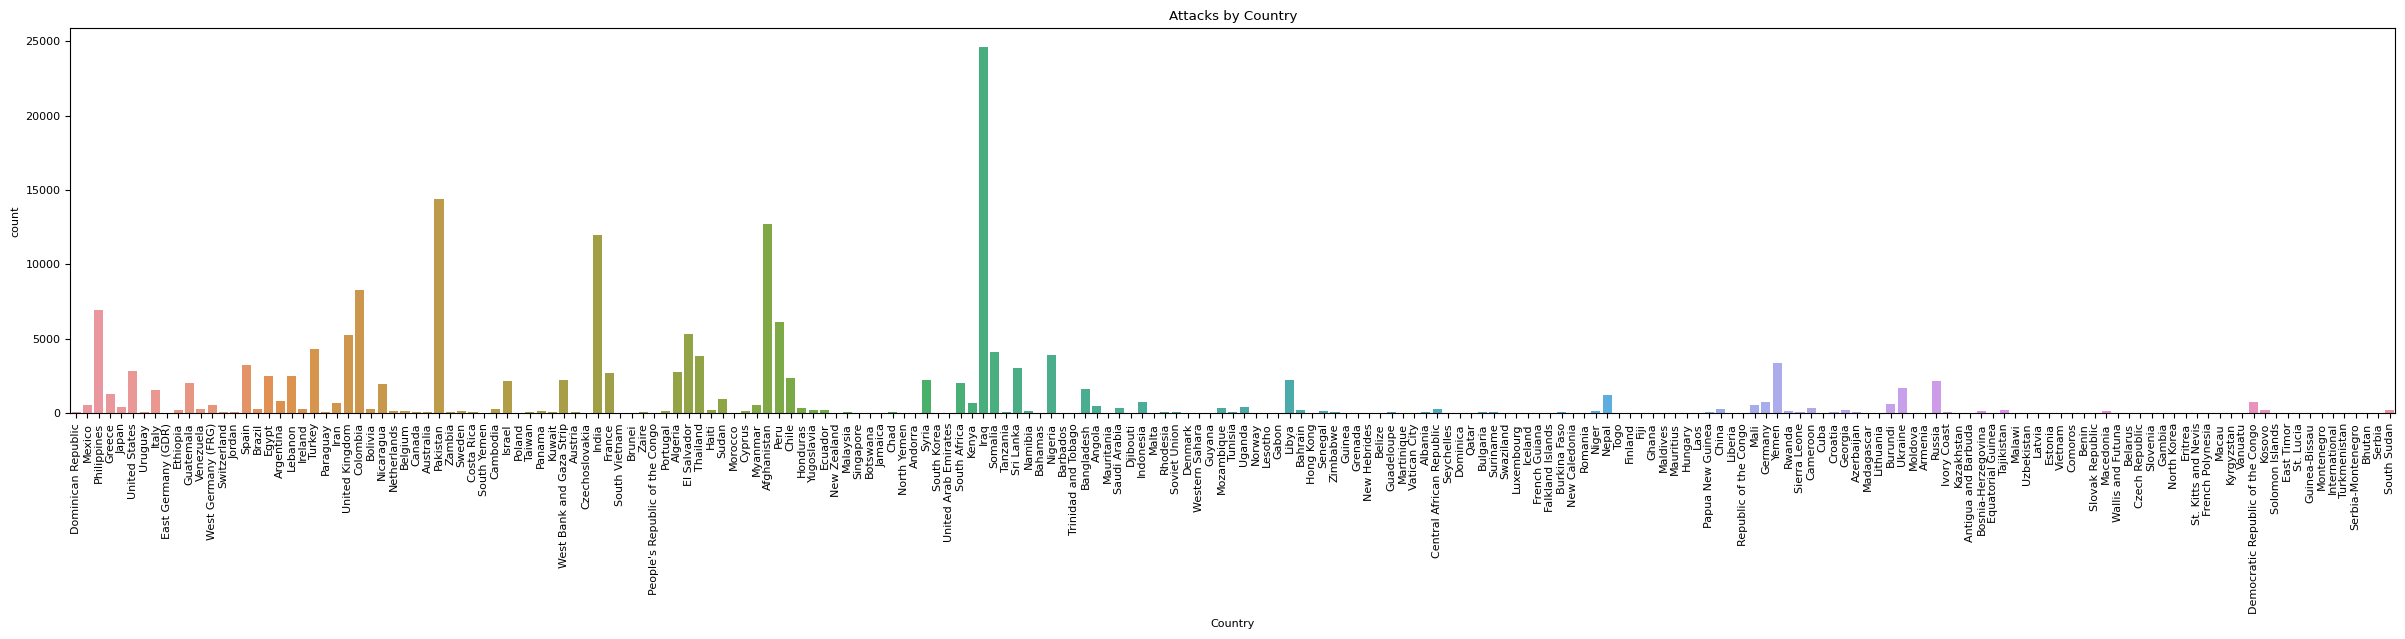

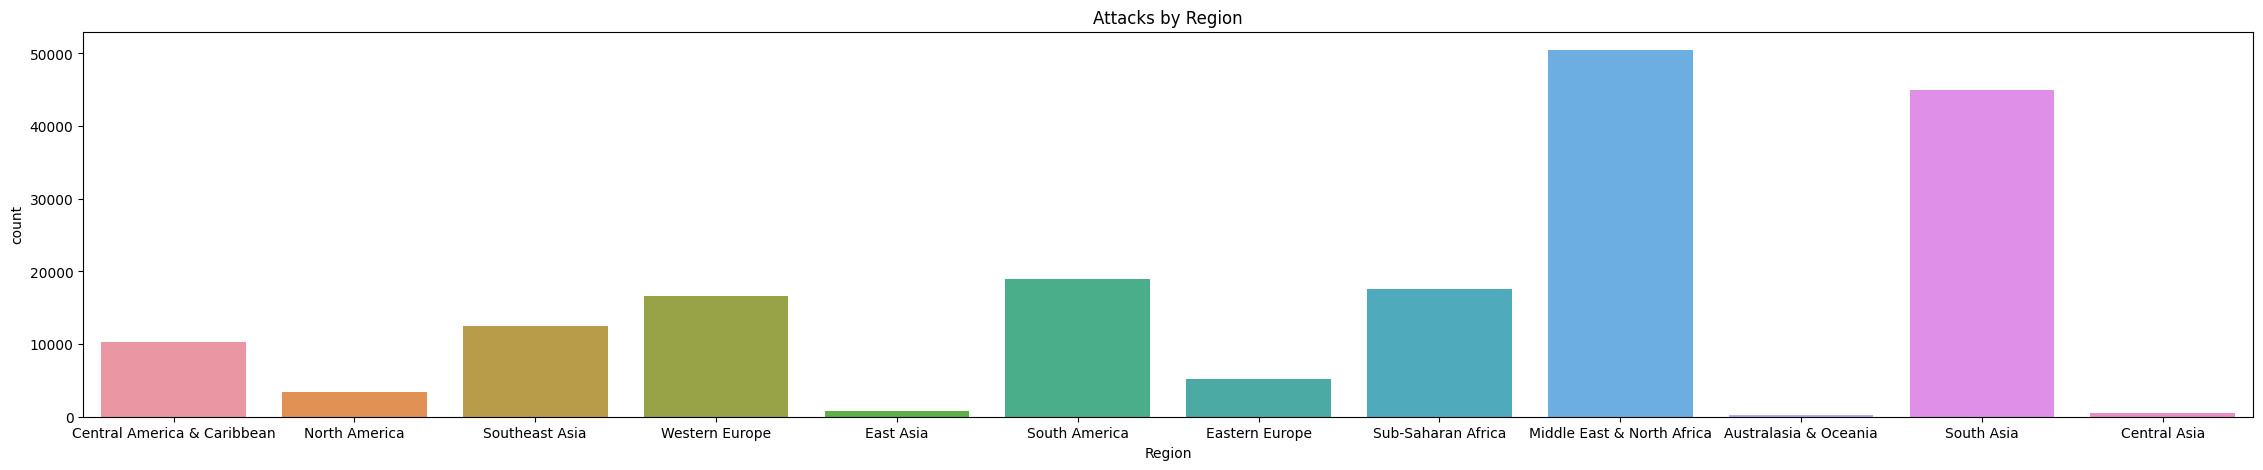

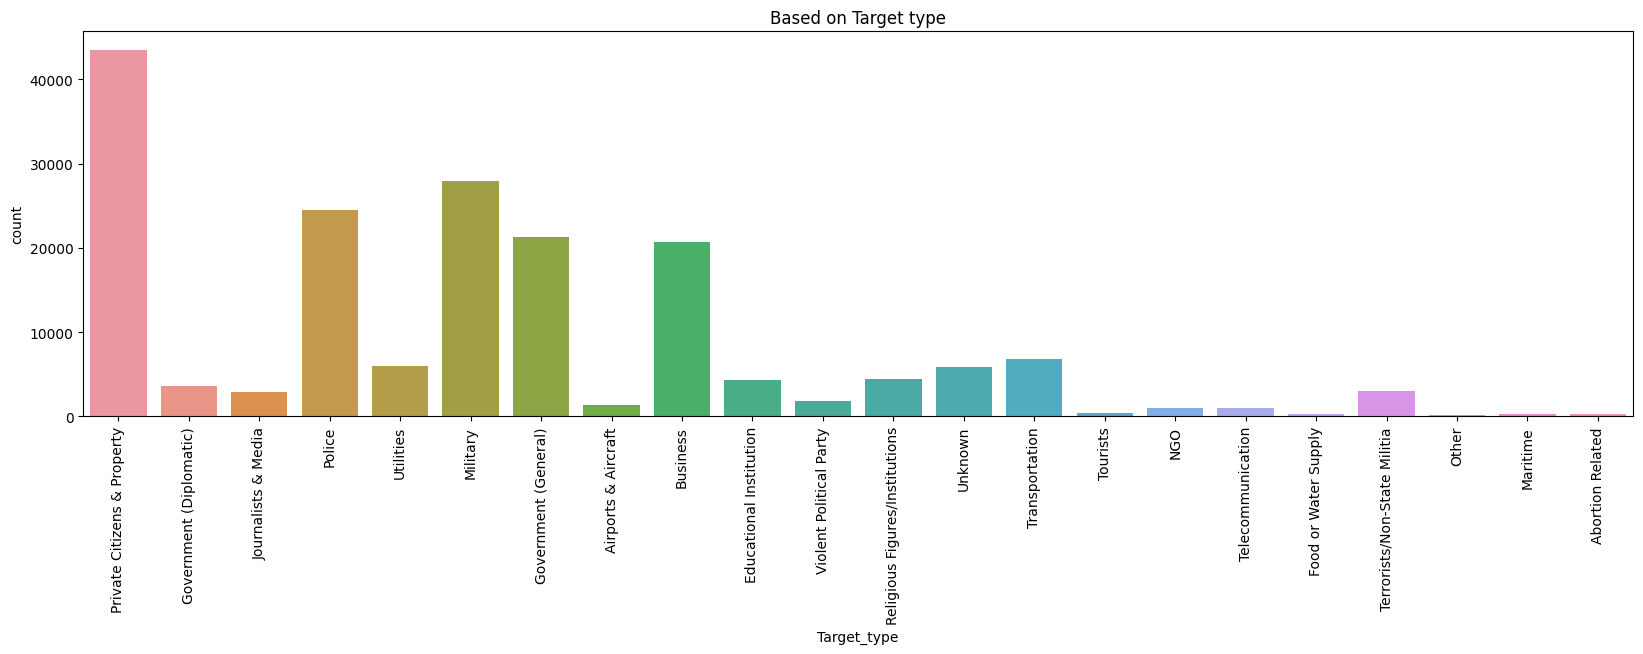

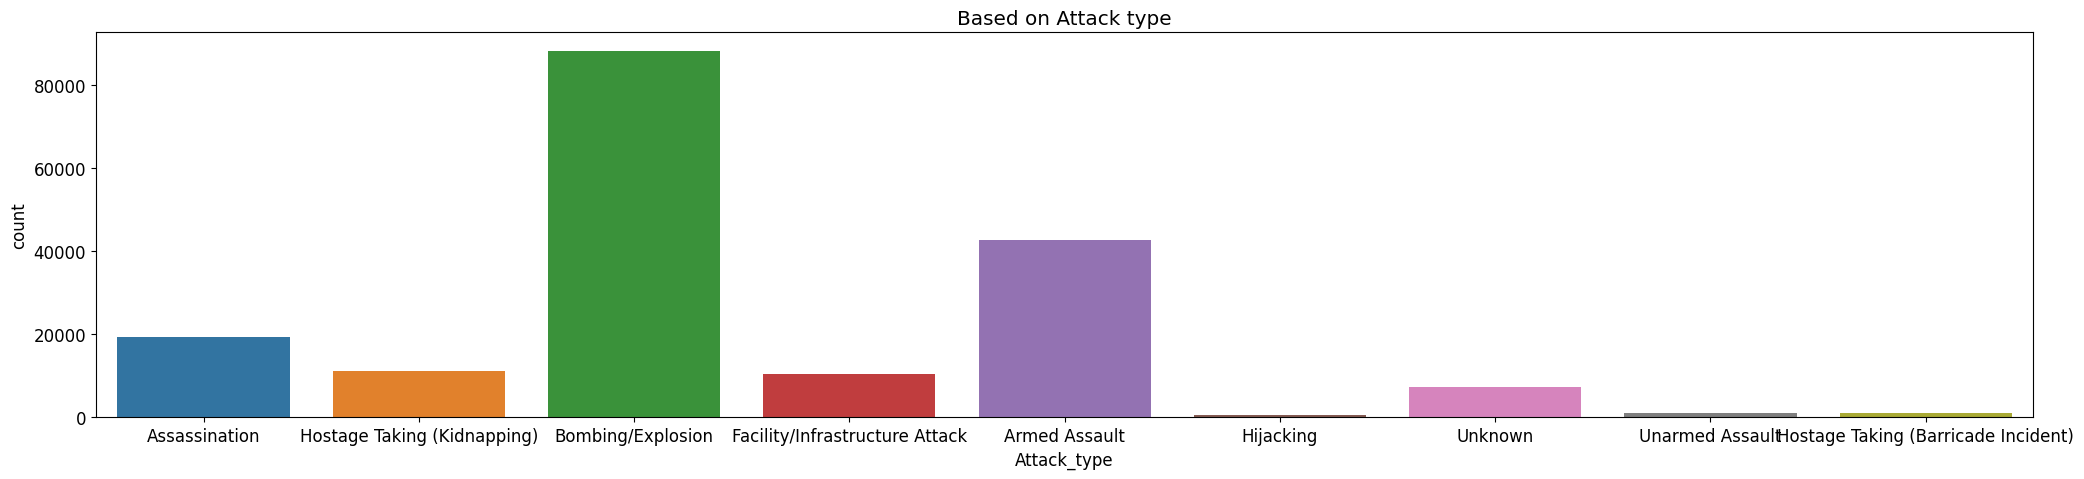

In [23]:
plt.figure(figsize=(20,5));
sns.countplot(x=terrorism.Weapon_type);

plt.figure(figsize=(20,5));
plt.xticks(rotation = 90)
plt.title('Attacks by Year')
sns.countplot(x=terrorism.Year);

plt.figure(figsize=(20,5));
plt.title('Attacks by Month')
sns.countplot(x=terrorism.Month);

plt.figure(figsize=(20,5));
plt.title('Attacks by Day')
sns.countplot(x=terrorism.Day);

plt.figure(figsize=(30,5));
plt.rcParams.update({'font.size':8});
plt.xticks(rotation = 90)
plt.title('Attacks by Country')
sns.countplot(x=terrorism.Country);

plt.figure(figsize=(28,5));
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 0)
plt.title('Attacks by Region')
sns.countplot(x=terrorism.Region);

plt.figure(figsize=(20,5));
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 90)
plt.title('Based on Target type')
sns.countplot(x=terrorism.Target_type);

plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':12});
plt.xticks(rotation = 0)
plt.title('Based on Attack type')
sns.countplot(x=terrorism.Attack_type);
